## Problem Statement: Simple Linear Regression

**Context:**
A health insurance company wants to understand how a customer’s age influences their medical charges. The company believes that as people get older, their medical expenses tend to increase.

**Objective:**
Build a Simple Linear Regression model that predicts medical charges (charges) based on a person’s age (age).

**Tasks for Students:**

1. Load the dataset and explore the columns.
2. Select age as the independent variable (X) and charges as the dependent variable (y).
3. Visualize the relationship between age and charges using a scatter plot.
4. Split the dataset into training and testing sets.
5. Train a Simple Linear Regression model.
6. Plot the regression line on the scatter plot to visualize predictions.
7. Evaluate the model using:
> 1. Mean Squared Error (MSE)
> 2. Root Mean Squared Error (RMSE)
> 3. R² Score
8. Interpret the slope (β1) and intercept (β0) in terms of the problem.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Insurance_data1.csv')

df

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
...,...,...
1333,50,10600.54830
1334,18,2205.98080
1335,18,1629.83350
1336,21,2007.94500


**Basic EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1338 non-null   int64  
 1   charges  1338 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 21.0 KB


In [4]:
df.describe()

,age,charges
count,1338.000000,1338.000000
mean,39.207025,13270.422265
std,14.049960,12110.011237
min,18.000000,1121.873900
25%,27.000000,4740.287150
50%,39.000000,9382.033000
75%,51.000000,16639.912515
max,64.000000,63770.428010


In [5]:
df.dtypes

age          int64
charges    float64
dtype: object

**checking duplicates**

- As there is a possibility of duplicates because no unique column is given. So, no need to check duplicates.

In [6]:
# checking null values

df.isnull().sum()

age        0
charges    0
dtype: int64

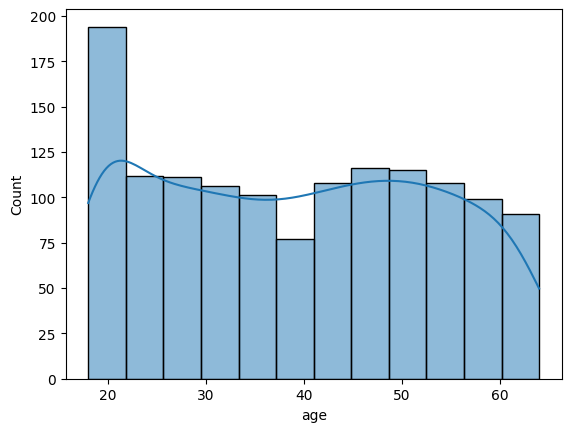

In [9]:
# checking outliers using histogram

sns.histplot(df['age'],kde=True)

plt.show()

As, the distribution is uniform (equally distributed), there is no point to look for outliers

### Identify target (dependent var) and feature (independent var)

In [59]:
feature = df[['age']]      # x
target = df[['charges']]  # y

In [60]:
# checking relationship

df1 = df.groupby(['age'])[['charges']].mean()

df1

,charges
age,
18,7086.217556
19,9747.909335
20,10159.697736
21,4730.464330
22,10012.932802
23,12419.820040
24,10648.015962
25,9838.365311
26,6133.825309


In [61]:
target.ndim

2

In [63]:
feature.ndim

2

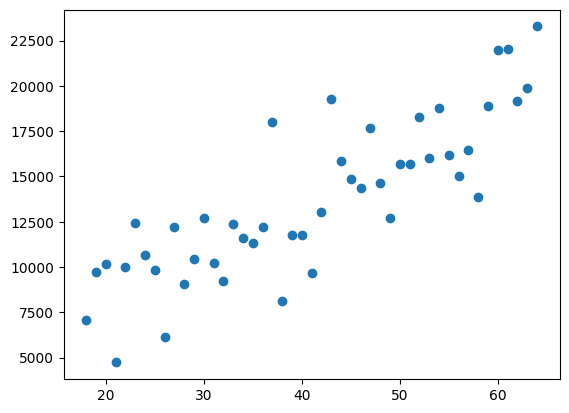

In [24]:
plt.scatter(df1.index,df1['charges'])

plt.show()

**We can clearly see, that there is a positive relationship between age and charges**

## Simple Linear Regression

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.linear_model import LinearRegression

In [64]:
# splitting data

x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=42)

In [65]:
print("Total data:",len(df))

Total data: 1338


In [66]:
print("Train data:",len(x_train))

Train data: 1070


In [67]:
print("Test Data:",len(x_test))

Test Data: 268


In [68]:
# model training

linreg = LinearRegression()  # create object

linreg.fit(x_train,y_train)  # model training

LinearRegression()

**Note:** Model learns from a 2D data, if we are using 1d data then take another square bracket to convert it into 2D data

In [70]:
y_pred = linreg.predict(x_test)

In [71]:
# calculate the charges for a person age 23

linreg.predict([[23]])

C:\Users\uwais\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[9410.64955933]])

In [72]:
# calculate the charges for a person age 50

linreg.predict([[50]])

C:\Users\uwais\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[15906.75667363]])

**Now, we can check the accuracy by using y_pred, it contains predicted charges, and we already have actual charges as y_test**